In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = {
    "x" : np.arange(1,21),
    "y" : np.array([0,0,0,1,0,0,0,1,0,1,1,0,1,1,1,0,1,1,1,1])
}
df = pd.DataFrame(data)
df.head()

,x,y
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression(solver= "lbfgs")
model.fit(df[["x"]], df["y"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
model.predict(df[["x"]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
df["y'"] = model.predict(df[["x"]])
df

,x,y,y'
0,1,0,0
1,2,0,0
2,3,0,0
3,4,1,0
4,5,0,0
5,6,0,0
6,7,0,0
7,8,1,0
8,9,0,0
9,10,1,1


#### Counting Probability

In [17]:
m = model.coef_[0][0]
c = model.intercept_[0]

df["prob1"] = 1 / (1 + np.exp(-1 * (m * df["x"] + c)))
df["prob0"] = 1 - df["prob1"]
df

,x,y,y',prob1,prob0
0,1,0,0,0.099368,0.900632
1,2,0,0,0.125635,0.874365
2,3,0,0,0.157630,0.842370
3,4,1,0,0.195947,0.804053
4,5,0,0,0.240915,0.759085
5,6,0,0,0.292449,0.707551
6,7,0,0,0.349925,0.650075
7,8,1,0,0.412118,0.587882
8,9,0,0,0.477249,0.522751
9,10,1,1,0.543164,0.456836


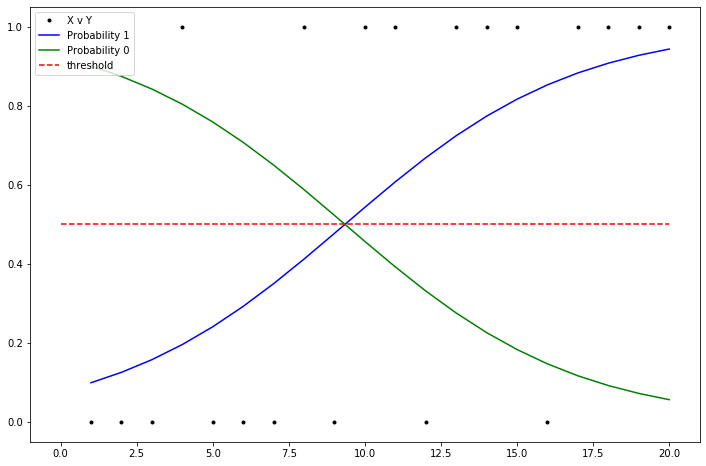

In [21]:
plt.figure(figsize= (12,8))
plt.plot(df["x"], df["y"], "k.")
plt.plot(df["x"], df["prob1"], "b-")
plt.plot(df["x"], df["prob0"], "g-")
plt.plot([0,20], [0.5, 0.5], "r--")
plt.legend(["X v Y", "Probability 1", "Probability 0", "threshold"])

<hr>

## Sklearn Probability Method

In [22]:
model.predict_proba(df[["x"]])

array([[0.90063238, 0.09936762],
       [0.87436535, 0.12563465],
       [0.84237009, 0.15762991],
       [0.80405267, 0.19594733],
       [0.75908475, 0.24091525],
       [0.70755061, 0.29244939],
       [0.65007454, 0.34992546],
       [0.58788192, 0.41211808],
       [0.52275066, 0.47724934],
       [0.45683642, 0.54316358],
       [0.39239982, 0.60760018],
       [0.3315049 , 0.6684951 ],
       [0.27577094, 0.72422906],
       [0.22623607, 0.77376393],
       [0.18334629, 0.81665371],
       [0.14704237, 0.85295763],
       [0.11689791, 0.88310209],
       [0.09226476, 0.90773524],
       [0.07239686, 0.92760314],
       [0.05654074, 0.94345926]])

In [23]:
df["skprob1"] = model.predict_proba(df[["x"]])[:, 1]
df["skprob0"] = model.predict_proba(df[["x"]])[:, 0]
df

,x,y,y',prob1,prob0,skprob1,skprob0
0,1,0,0,0.099368,0.900632,0.099368,0.900632
1,2,0,0,0.125635,0.874365,0.125635,0.874365
2,3,0,0,0.157630,0.842370,0.157630,0.842370
3,4,1,0,0.195947,0.804053,0.195947,0.804053
4,5,0,0,0.240915,0.759085,0.240915,0.759085
5,6,0,0,0.292449,0.707551,0.292449,0.707551
6,7,0,0,0.349925,0.650075,0.349925,0.650075
7,8,1,0,0.412118,0.587882,0.412118,0.587882
8,9,0,0,0.477249,0.522751,0.477249,0.522751
9,10,1,1,0.543164,0.456836,0.543164,0.456836


#### Prediksi y dengan threshold 0.8

In [24]:
df["y't0.8"] = df["skprob1"].apply(lambda x : 1 if (x > 0.8) else 0)
df

,x,y,y',prob1,prob0,skprob1,skprob0,y't0.8
0,1,0,0,0.099368,0.900632,0.099368,0.900632,0
1,2,0,0,0.125635,0.874365,0.125635,0.874365,0
2,3,0,0,0.157630,0.842370,0.157630,0.842370,0
3,4,1,0,0.195947,0.804053,0.195947,0.804053,0
4,5,0,0,0.240915,0.759085,0.240915,0.759085,0
5,6,0,0,0.292449,0.707551,0.292449,0.707551,0
6,7,0,0,0.349925,0.650075,0.349925,0.650075,0
7,8,1,0,0.412118,0.587882,0.412118,0.587882,0
8,9,0,0,0.477249,0.522751,0.477249,0.522751,0
9,10,1,1,0.543164,0.456836,0.543164,0.456836,0


<hr>